# Predict the final number of MP's in the Portugese Parliament through regression

# Load and take a look at the data

In [1]:
# Load relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data
ds=pd.read_csv('ElectionData.csv')

In [3]:
ds.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


In [4]:
ds.shape

(21643, 28)

In [5]:
ds.dtypes

TimeElapsed                   int64
time                         object
territoryName                object
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                        object
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates               

# Check and treat null values

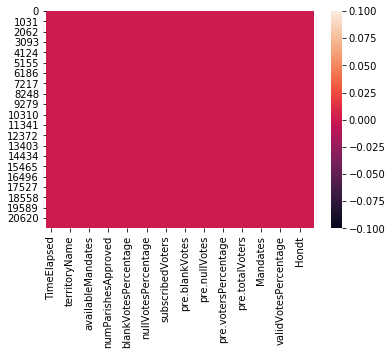

In [6]:
sns.heatmap(ds.isnull())

In [7]:
ds.isnull().sum()

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

No null values present.

# Check correlation

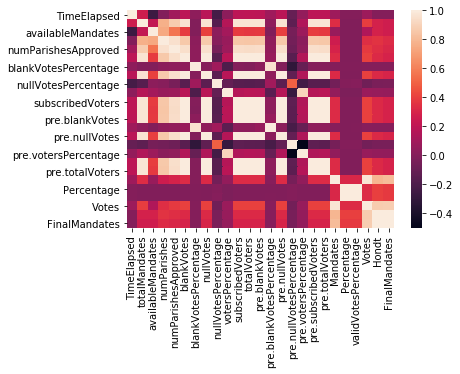

In [8]:
dscor=ds.corr()
sns.heatmap(dscor)

# Summary statistics

In [9]:
ds.describe()

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
count,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,...,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,2.164300e+04,21643.000000,21643.000000
mean,133.146052,11.544795,11.499284,309.956013,261.090237,8875.066673,2.621629,6148.068752,1.961471,51.983722,...,1.777442,54.549372,6.378503e+05,3.594932e+05,0.565495,4.968484,5.207232,1.585209e+04,1.126138,1.126138
std,77.651193,31.314567,31.738783,659.055911,583.377428,21484.874088,0.795289,14735.469269,0.375250,4.854380,...,0.388798,4.964948,1.544418e+06,8.763729e+05,4.421804,10.379967,10.881108,9.310605e+04,6.293552,6.872644
min,0.000000,0.000000,0.000000,54.000000,3.000000,19.000000,0.530000,39.000000,1.340000,35.980000,...,1.140000,40.870000,6.383000e+03,3.215000e+03,0.000000,0.020000,0.020000,1.000000e+00,0.000000,0.000000
25%,65.000000,1.000000,0.000000,75.000000,67.000000,1188.000000,2.230000,1094.000000,1.720000,50.290000,...,1.520000,51.210000,1.289260e+05,6.964400e+04,0.000000,0.220000,0.230000,2.360000e+02,0.000000,0.000000
50%,135.000000,4.000000,3.000000,147.000000,120.000000,2998.000000,2.640000,2232.000000,1.870000,53.130000,...,1.690000,56.260000,2.284970e+05,1.102730e+05,0.000000,0.620000,0.650000,7.900000e+02,0.000000,0.000000
75%,200.000000,9.000000,9.000000,242.000000,208.000000,6889.000000,2.980000,4121.000000,2.230000,54.550000,...,1.970000,58.220000,3.933140e+05,2.276200e+05,0.000000,3.010000,3.160000,4.510000e+03,0.000000,0.000000
max,265.000000,226.000000,226.000000,3092.000000,3092.000000,129599.000000,5.460000,88539.000000,3.350000,59.870000,...,3.120000,62.580000,9.439701e+06,5.380451e+06,106.000000,49.110000,51.420000,1.866407e+06,94.000000,106.000000


# Data visualizations

In [10]:
ds.columns

Index(['TimeElapsed', 'time', 'territoryName', 'totalMandates',
       'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates'],
      dtype='object')

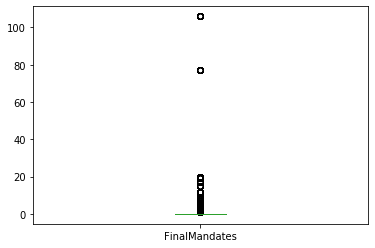

In [11]:
# Check for outliers
ds['FinalMandates'].plot.box()

Definite outliers present.

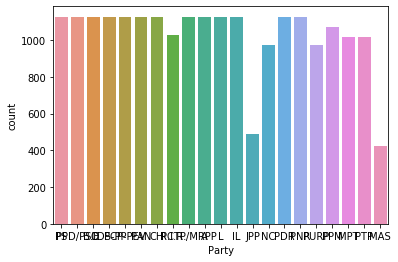

In [12]:
sns.countplot(ds['Party'])

In [13]:
ds.groupby('Party')['Party'].count()

Party
A            1127
B.E.         1127
CDS-PP       1127
CH           1127
IL           1127
JPP           486
L            1127
MAS           425
MPT          1019
NC            972
PAN          1127
PCP-PEV      1127
PCTP/MRPP    1127
PDR          1127
PNR          1127
PPD/PSD      1127
PPM          1073
PS           1127
PTP          1019
PURP          972
R.I.R.       1026
Name: Party, dtype: int64

'TimeElapsed', 'time', 'territoryName', 'totalMandates',
       'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates'

In [14]:
ds.groupby(['territoryName'])['Mandates', 'Votes', 'Hondt', 'FinalMandates'].sum()

,Mandates,Votes,Hondt,FinalMandates
territoryName,,,,
Aveiro,429,11897443,864,864
Açores,156,3066885,235,235
Beja,123,2877763,162,162
Braga,646,18123679,1026,1026
Bragança,87,2618008,162,162
Castelo Branco,138,4047781,216,216
Coimbra,274,7557963,486,486
Faro,287,6651208,486,486
Guarda,108,3353691,162,162


In [15]:
ds.groupby(['territoryName'])['Mandates', 'validVotesPercentage', 'Votes', 'Hondt', 'FinalMandates'].mean()

,Mandates,validVotesPercentage,Votes,Hondt,FinalMandates
territoryName,,,,,
Aveiro,0.397222,5.000537,11016.150926,0.800000,0.800000
Açores,0.195244,5.882578,3838.404255,0.294118,0.294118
Beja,0.133987,5.881057,3134.818083,0.176471,0.176471
Braga,0.569665,4.761728,15982.080247,0.904762,0.904762
Bragança,0.089506,5.555967,2693.423868,0.166667,0.166667
Castelo Branco,0.141975,5.555617,4164.383745,0.222222,0.222222
Coimbra,0.253704,5.000481,6998.113889,0.450000,0.450000
Faro,0.279727,5.263285,6482.658869,0.473684,0.473684
Guarda,0.105263,5.262641,3268.704678,0.157895,0.157895


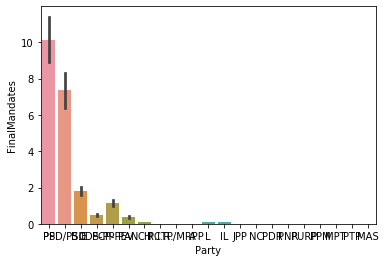

In [16]:
sns.barplot(x='Party',y='FinalMandates', data=ds)

There seem to be 2 dominant parties PBD and (unable to see)

# Encode categorical columns to numeric values

In [17]:
eds=ds

In [18]:
eds.columns

Index(['TimeElapsed', 'time', 'territoryName', 'totalMandates',
       'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates'],
      dtype='object')

In [19]:
eds.dtypes

TimeElapsed                   int64
time                         object
territoryName                object
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                        object
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates               

In [20]:
# Change categorical data to numerical data for 2 categoriacl columns

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['territoryName', 'Party']
for col in cols:
    ds[col] = le.fit_transform(ds[col])

In [21]:
eds.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,16,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,17,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,16,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,15,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,16,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,1,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,16,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,2,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,16,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,11,0,4.59,4.83,17757,11,12


# Check correlation after encoding

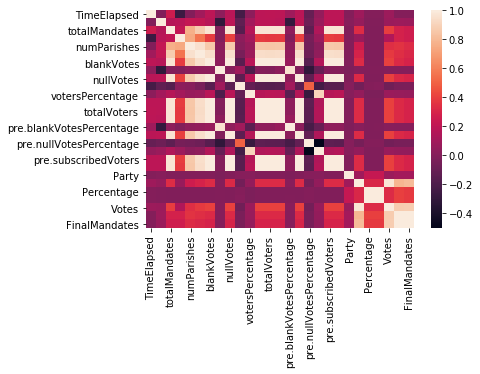

In [22]:
dscor=eds.corr()
sns.heatmap(dscor)

correlation to the target column:
    Best: Hondt, Votes, Mandates
    Worst: TimeElapsed, time, blankVotesPercentage, nullVotesPercentage, votersPercentage, pre.blankVotesPercentage,pre.nullVotesPercentage, pre.votersPercentage, Party        

# Drop irrelevant columns

In [23]:
eds.columns

Index(['TimeElapsed', 'time', 'territoryName', 'totalMandates',
       'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates'],
      dtype='object')

In [24]:
# Drop irrelevant (poorly correlated) columns - dataset renamed to nds (new dataset)
nds=ds.drop(columns=['time'])

# Find and remove outliers

In [25]:
nds.shape

(21643, 27)

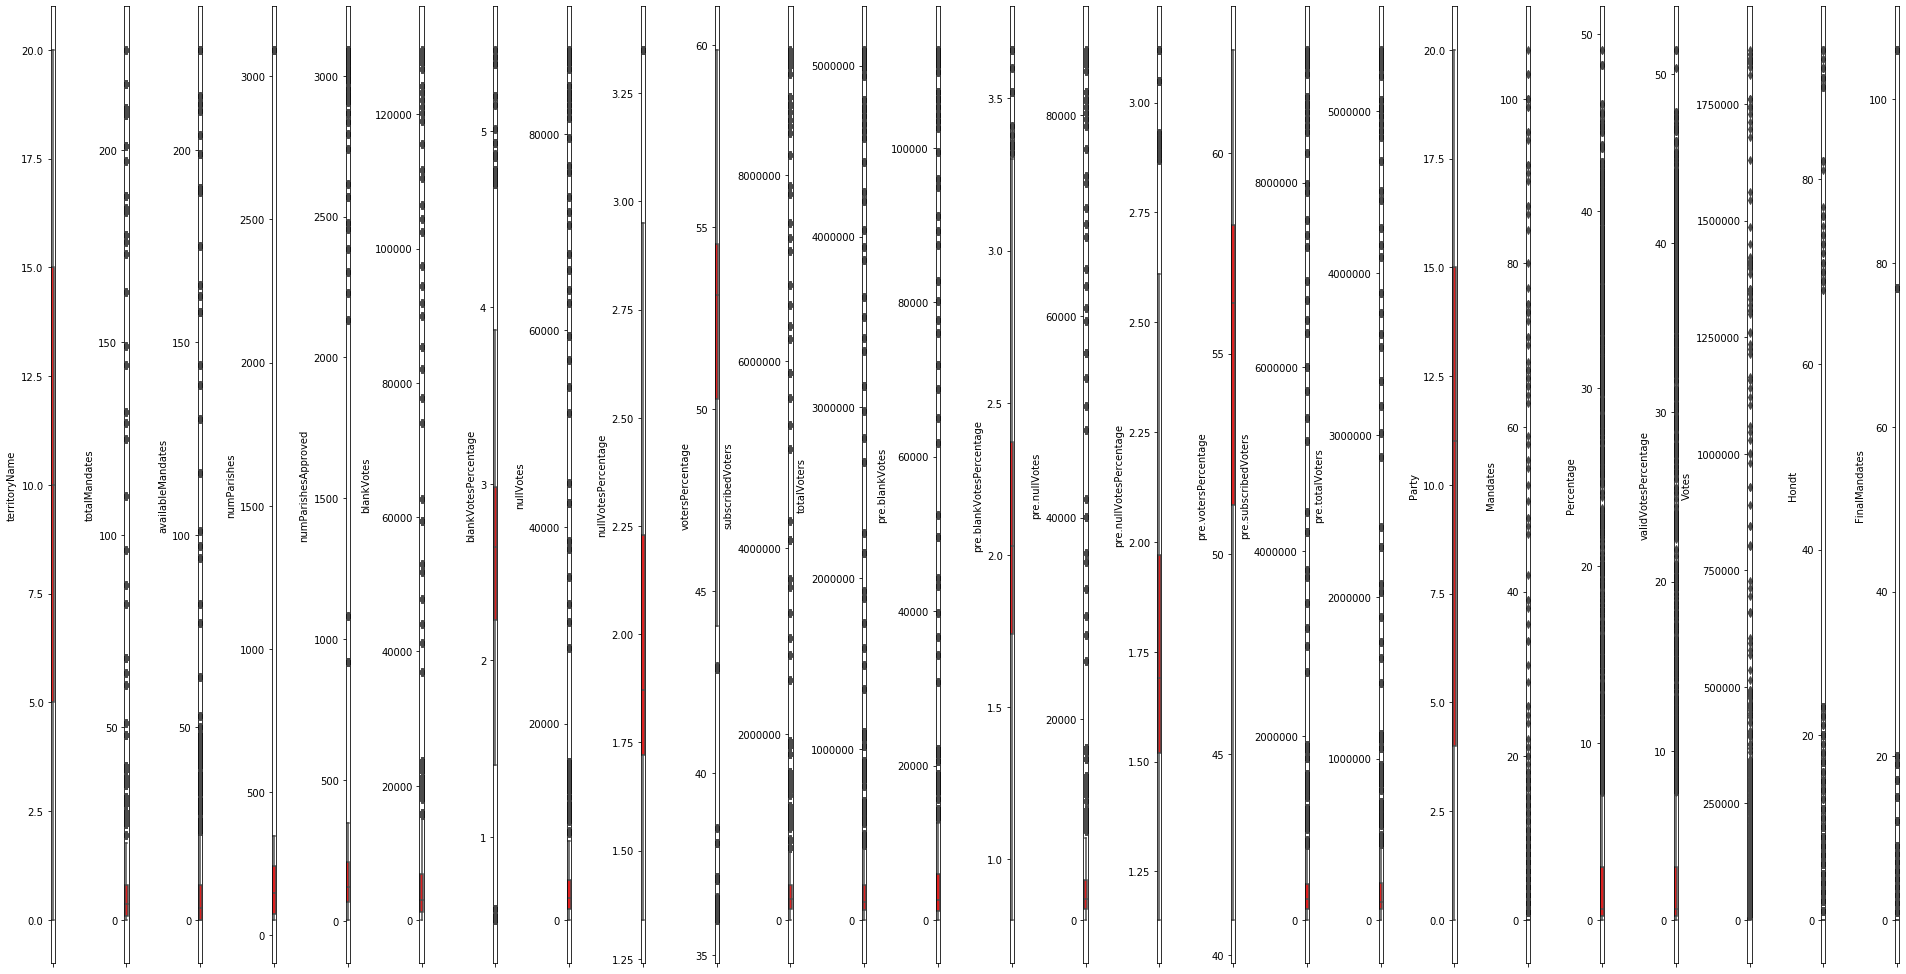

In [26]:
# Show boxplots for all columns, check outliers
collist=nds.columns.values
ncol=27
nrows=10

plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(nds[collist[i]], color='red', orient='v')
    plt.tight_layout()

In [27]:
# Remove outliers - dataset renamed to cds (clean dataset)
from scipy import stats
from scipy.stats import zscore

z_score=abs(zscore(nds))
print(nds.shape)
cds=nds.loc[(z_score<3).all(axis=1)]
print(cds.shape)

(21643, 27)
(18333, 27)


# Check and adjust skewness

In [28]:
# Show skewness (less than 0.55 is ok)
cds.skew()

TimeElapsed                -0.024110
territoryName               0.034073
totalMandates               2.542453
availableMandates           2.593527
numParishes                 0.585363
numParishesApproved         0.619329
blankVotes                  1.800122
blankVotesPercentage       -0.844508
nullVotes                   2.103352
nullVotesPercentage         0.564426
votersPercentage           -0.392023
subscribedVoters            2.407541
totalVoters                 2.468630
pre.blankVotes              2.034860
pre.blankVotesPercentage   -0.410446
pre.nullVotes               2.340000
pre.nullVotesPercentage     1.033803
pre.votersPercentage       -0.514215
pre.subscribedVoters        2.370988
pre.totalVoters             2.468950
Party                       0.009657
Mandates                    7.177093
Percentage                  3.373567
validVotesPercentage        3.383145
Votes                       7.310058
Hondt                       7.012845
FinalMandates               6.746120
d

In [29]:
#Treat skewness using log
for col in cds.columns:
    if cds.skew().loc[col]>0.55:
        cds[col]=np.log1p(cds[col])

In [30]:
cds.skew()

TimeElapsed                -0.024110
territoryName               0.034073
totalMandates               0.020702
availableMandates           0.503375
numParishes                -0.138265
numParishesApproved        -1.099103
blankVotes                 -0.592756
blankVotesPercentage       -0.844508
nullVotes                  -0.880145
nullVotesPercentage         0.329675
votersPercentage           -0.392023
subscribedVoters           -0.772107
totalVoters                -0.647681
pre.blankVotes             -0.642916
pre.blankVotesPercentage   -0.410446
pre.nullVotes              -0.937998
pre.nullVotesPercentage     0.628444
pre.votersPercentage       -0.514215
pre.subscribedVoters       -0.802802
pre.totalVoters            -0.670218
Party                       0.009657
Mandates                    4.479200
Percentage                  1.565493
validVotesPercentage        1.550088
Votes                       0.268973
Hondt                       3.488567
FinalMandates               3.368168
d

# Split data into x and y

In [31]:
cds.columns

Index(['TimeElapsed', 'territoryName', 'totalMandates', 'availableMandates',
       'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates'],
      dtype='object')

In [32]:
# Lineup target and input values
x=cds.drop(columns=['FinalMandates'])
y=cds[['FinalMandates']]

In [35]:
x.skew()

TimeElapsed                -0.024110
territoryName               0.034073
totalMandates               0.020702
availableMandates           0.503375
numParishes                -0.138265
numParishesApproved        -1.099103
blankVotes                 -0.592756
blankVotesPercentage       -0.844508
nullVotes                  -0.880145
nullVotesPercentage         0.329675
votersPercentage           -0.392023
subscribedVoters           -0.772107
totalVoters                -0.647681
pre.blankVotes             -0.642916
pre.blankVotesPercentage   -0.410446
pre.nullVotes              -0.937998
pre.nullVotesPercentage     0.628444
pre.votersPercentage       -0.514215
pre.subscribedVoters       -0.802802
pre.totalVoters            -0.670218
Party                       0.009657
Mandates                    4.479200
Percentage                  1.565493
validVotesPercentage        1.550088
Votes                       0.268973
Hondt                       3.488567
dtype: float64

# Train-Test split

In [36]:
# Train test split
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, random_state=55, test_size=0.20)

# Model

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.externals import joblib
from sklearn import linear_model

In [38]:
# Error calculation
max_r_score=0
for r_state in range(42,100):
    x_train,x_test, y_train, y_test = train_test_split(x,y, random_state=r_state, test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("Max r2 score for",final_r_state,"is", max_r_score)

Max r2 score for 89 is 0.9843186538427783


In [39]:
# Crossvalidation
cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring='r2').mean()

0.9789832736106698

In [40]:
# R2 score gives us a rondom state of 51
x_train,x_test, y_train, y_test = train_test_split(x,y, random_state=51, test_size=0.20)
lreg=linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [41]:
# R2 and Mean squared error statements
print('r score is: ',r2_score(y_test,y_pred))
print('RMSE is: ', np.sqrt(mean_squared_error(y_test, y_pred)))

r score is:  0.9757854525861362
RMSE is:  0.06655782388690883


I choose the Linear Regression model because it has the best score

Mean r2 score for GradientBoosting Regression: 97.6
Standard deviation in r2 score for GradientBoosting Regression: 6.7

# Save the model

In [42]:
#save model as a pickle file
from sklearn.externals import joblib
joblib.dump(lreg,'Final_Mandates.pkl')

['Final_Mandates.pkl']

In [43]:
# Load and use model to make a prediction
model=joblib.load('Final_Mandates.pkl')
model.predict(x_test)

array([[-0.00402212],
       [ 0.00106705],
       [ 0.00711807],
       ...,
       [ 0.00502681],
       [ 0.00291484],
       [ 0.00717295]])